
<a id='matplotlib'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Matplotlib


<a id='index-1'></a>

## Contents

- [Matplotlib](#Matplotlib)  
  - [Overview](#Overview)  
  - [The APIs](#The-APIs)  
  - [More Features](#More-Features)  
  - [Further Reading](#Further-Reading)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

## Overview

We’ve already generated quite a few figures in these lectures using [Matplotlib](http://matplotlib.org/).

Matplotlib is an outstanding graphics library, designed for scientific computing, with

- high-quality 2D and 3D plots  
- output in all the usual formats (PDF, PNG, etc.)  
- LaTeX integration  
- fine-grained control over all aspects of presentation  
- animation, etc.  

### Matplotlib’s Split Personality

Matplotlib is unusual in that it offers two different interfaces to plotting.

One is a simple MATLAB-style API (Application Programming Interface) that was written to help MATLAB refugees find a ready home.

The other is a more “Pythonic” object-oriented API.

For reasons described below, we recommend that you use the second API.

But first, let’s discuss the difference.

## The APIs


<a id='index-2'></a>

### The MATLAB-style API

Here’s the kind of easy example you might find in introductory treatments

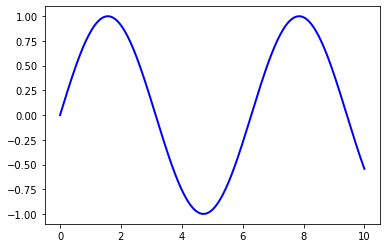

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

This is simple and convenient, but also somewhat limited and un-Pythonic.

For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer.

Python programmers tend to prefer a more explicit style of programming (run `import this` in a code block and look at the second line).

This leads us to the alternative, object-oriented Matplotlib API.

In [5]:
import this

### The Object-Oriented API

Here’s the code corresponding to the preceding figure using the object-oriented API

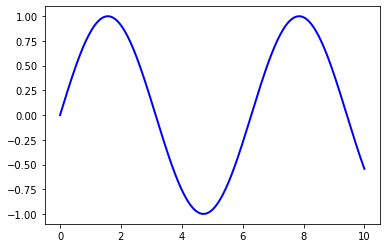

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

Here the call `fig, ax = plt.subplots()` returns a pair, where

- `fig` is a `Figure` instance—like a blank canvas.  
- `ax` is an `AxesSubplot` instance—think of a frame for plotting in.  


The `plot()` function is actually a method of `ax`.

While there’s a bit more typing, the more explicit use of objects gives us better control.

This will become more clear as we go along.

### Tweaks

Here we’ve changed the line to red and added a legend

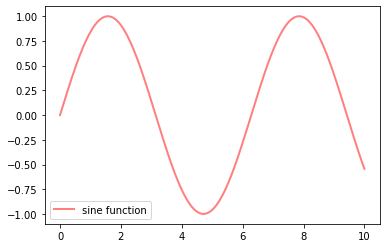

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.5)
ax.legend()
plt.show()

We’ve also used `alpha` to make the line slightly transparent—which makes it look smoother.

The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`.

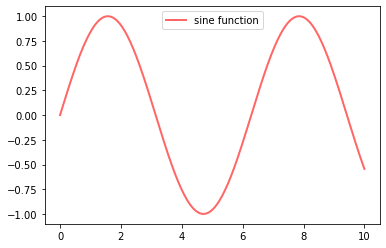

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

If everything is properly configured, then adding LaTeX is trivial

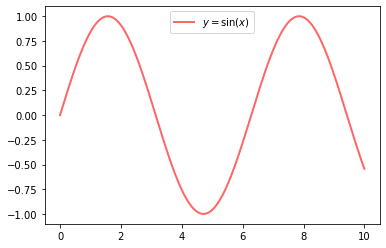

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

Controlling the ticks, adding titles and so on is also straightforward

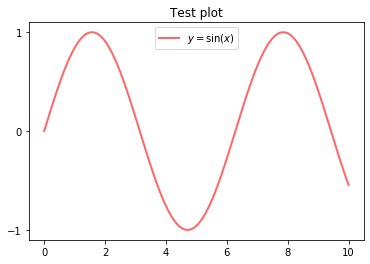

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

## More Features

Matplotlib has a huge array of functions and features, which you can discover
over time as you have need for them.

We mention just a few.

### Multiple Plots on One Axis


<a id='index-3'></a>
It’s straightforward to generate multiple plots on the same axes.

Here’s an example that randomly generates three normal densities and adds a label with their mean

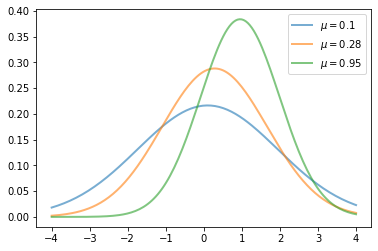

In [14]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

### Multiple Subplots


<a id='index-4'></a>
Sometimes we want multiple subplots in one figure.

Here’s an example that generates 6 histograms

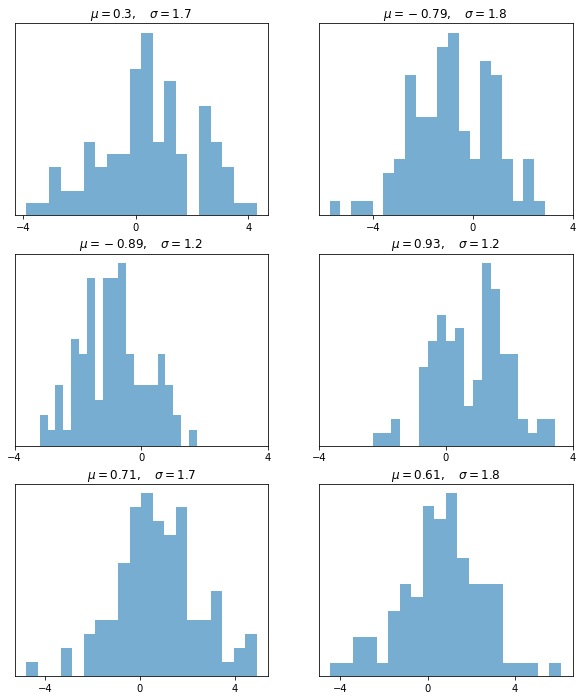

In [15]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

### 3D Plots


<a id='index-5'></a>
Matplotlib does a nice job of 3D plots — here is one example

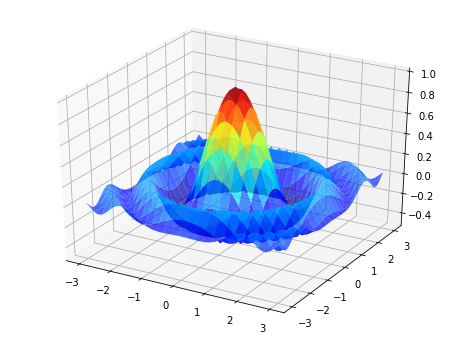

In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

### A Customizing Function

Perhaps you will find a set of customizations that you regularly use.

Suppose we usually prefer our axes to go through the origin, and to have a grid.

Here’s a nice example from [Matthew Doty](https://github.com/xcthulhu) of how the object-oriented API can be used to build a custom `subplots` function that implements these changes.

Read carefully through the code and see if you can follow what’s going on

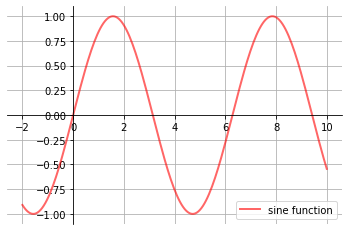

In [21]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

The custom `subplots` function

1. calls the standard `plt.subplots` function internally to generate the `fig, ax` pair,  
1. makes the desired customizations to `ax`, and  
1. passes the `fig, ax` pair back to the calling code.  

## Further Reading

- The [Matplotlib gallery](http://matplotlib.org/gallery.html) provides many examples.  
- A nice [Matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html) by Nicolas Rougier, Mike Muller and Gael Varoquaux.  
- [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy
  switching between plot styles.  
- [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib.  

## Exercises

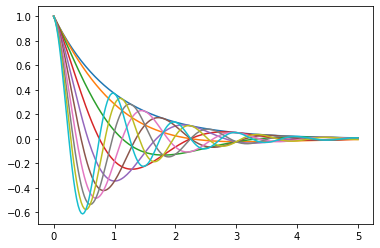

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig,ax=plt.subplots()
the=np.linspace(0,2,10)
def f(x,the):
    return np.cos(np.pi*the*x)*np.exp(-x)
x=np.linspace(0,5,200)
for t in the:
    ax.plot(x,f(x,t))
plt.show()

In [23]:
np.exp((0,1))

array([1.        , 2.71828183])

### Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

<img src="https://s3-ap-southeast-2.amazonaws.com/python.quantecon.org/_static/lecture_specific/matplotlib/matplotlib_ex1.png" style="">

## Solutions

### Exercise 1

Here’s one solution

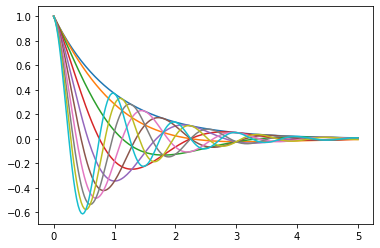

In [33]:
def f(x, θ):
    return np.cos(np.pi * θ * x ) * np.exp(- x)

θ_vals = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 200)
fig, ax = plt.subplots()

for θ in θ_vals:
    ax.plot(x, f(x, θ))

plt.show()